In [1]:
# import your code
from encoder import encode, header_bits
from decoder import decode
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

from simple_lbt_functions import *


In [16]:
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

#encode
step = 10
vlc, header = encode(X,jpeg_quant_size = step)
bits = vlc[:,1].sum()
print(f"Bits: {bits}")
print(header_bits(header))

#decode
Z = decode(vlc, header)
print(np.min(Z), np.max(Z)) # min max of Z
#print(Z[::64,::64].astype(int)) # typical numbers

fig, ax = plt.subplots()
plot_image(Z)

print(f"RMS = {np.std(X-Z)}")



ValueError: DC coefficients too large for desired number of bits

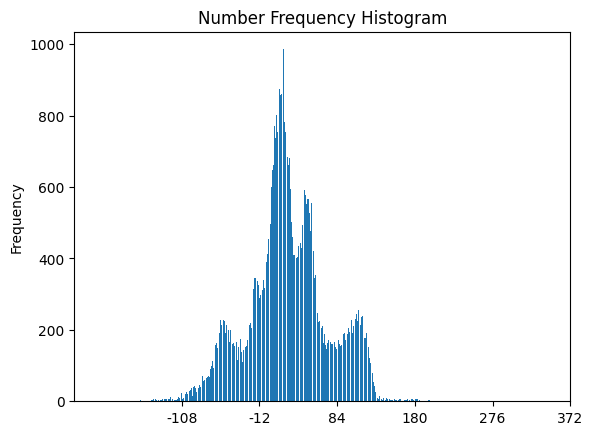

In [ ]:
import matplotlib.pyplot as plt

def histogram_image(Z):
    flattened_array = Z.astype(int).flatten()
    hist, bins = np.histogram(flattened_array, bins=np.arange(min(flattened_array), max(flattened_array)+2))
    fig, ax = plt.subplots()
    ax.bar(bins[:-1], hist, align='center')
    xtick_positions = np.linspace(0, len(bins) - 2, num=6, dtype=int)
    xtick_labels = bins[:-1][xtick_positions]
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels)
    ax.set_ylabel('Frequency')
    ax.set_title('Number Frequency Histogram')
    plt.show()

histogram_image(Z)

In [17]:
Y = lbt(X, N=8, s=1.31)
Z = ilbt(Y, N=8, s=1.31)
#assert((X==Z).all())
print(np.std(X-Z))


1.0994063620348612e-13


In [18]:
Z = LBT(X,N=8,s=1.31)
print(np.std(X-Z))

1.0994063620348612e-13


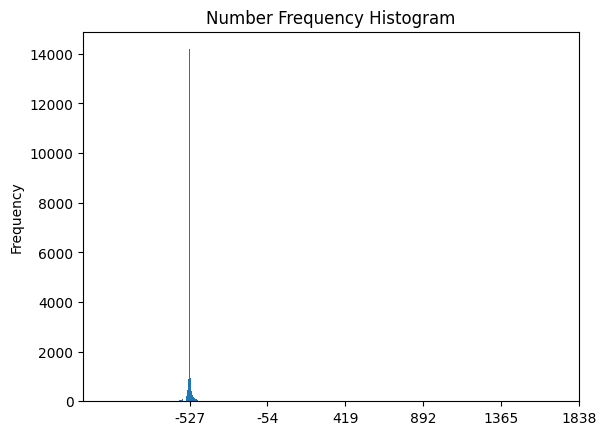

In [14]:
histogram_image(Y)

In [15]:
print(np.min(Y), np.max(Y))
print(Y[::32,::32].astype(int))

-527.2947693007175 1838.1249999999998
[[ 949  981  947  934  991  898 1023 1186]
 [ 770  771  947  955 1056  398 1264 1219]
 [1073 1075  818  972  813 1659 1260 1263]
 [1128  911  988 1120  835  808 1154 1166]
 [1310  706  861  865  708 1613 1072 1113]
 [1717 1441 1606  956 1821 1682  669  520]
 [ 941 1385 1276 1452 1455 1357 1337 1168]
 [1274 1309  934 1216 1214  889  888  598]]
